In [ ]:
import os
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model

In [ ]:
model = VGG16()
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
#print(model.summary())

553467096/553467096 [==============================] - 4s 0us/step


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
directory = '/content/drive/MyDrive/data/'

features = {}


for item in os.listdir(directory):
    item_path = os.path.join(directory, item)

    if os.path.isdir(item_path):
        continue

    try:
        img = load_img(item_path, target_size=(224, 224))
        img = img_to_array(img)
        img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))
        img = preprocess_input(img)
        feature = model.predict(img, verbose=0)
        features[item_path] = feature
        #print(item_path)

    except Exception as e:
        print(f"Error processing item at {item_path}: {e}")

Error processing item at /content/drive/MyDrive/data/selected_features.pkl: cannot identify image file <_io.BytesIO object at 0x7fe1f43ae700>
Error processing item at /content/drive/MyDrive/data/normalized_features.pkl: cannot identify image file <_io.BytesIO object at 0x7fe1f4320d10>


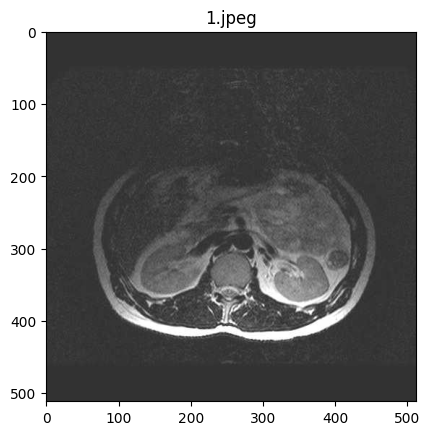

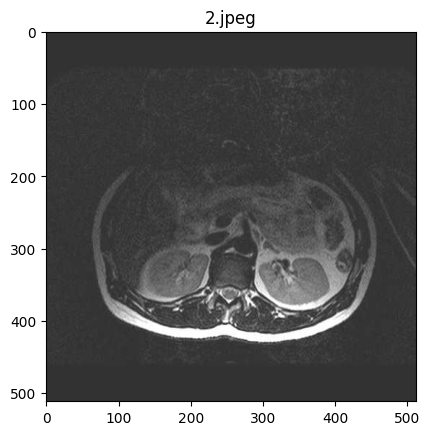

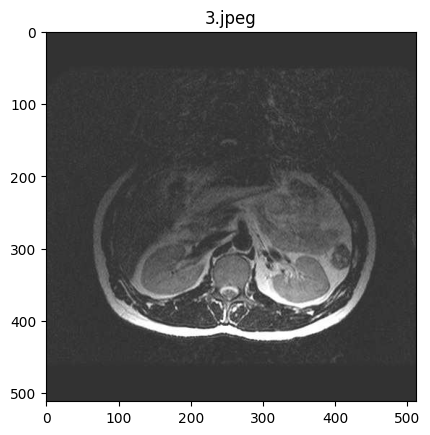

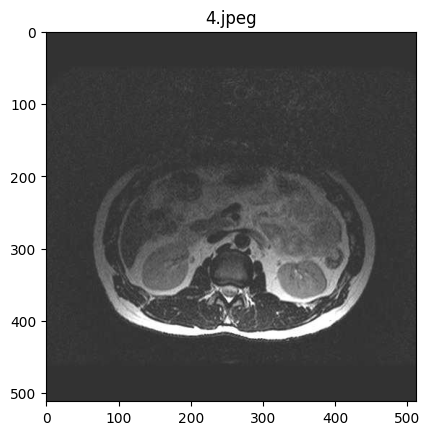

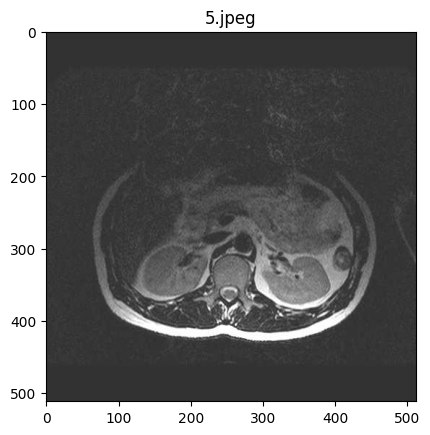

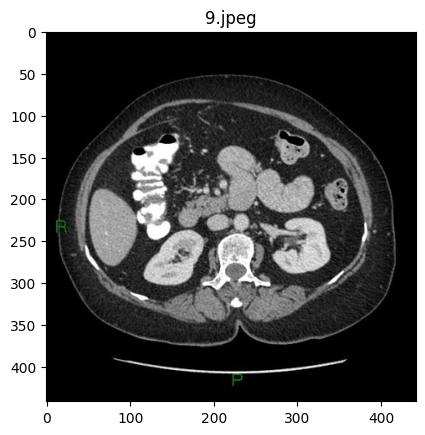

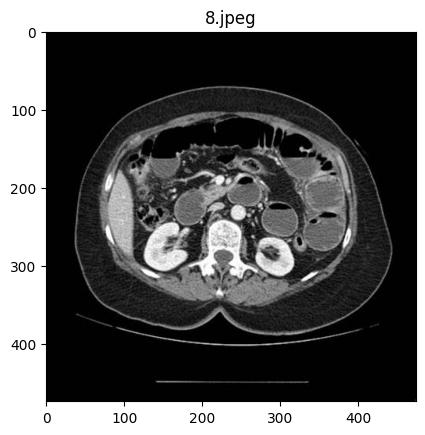

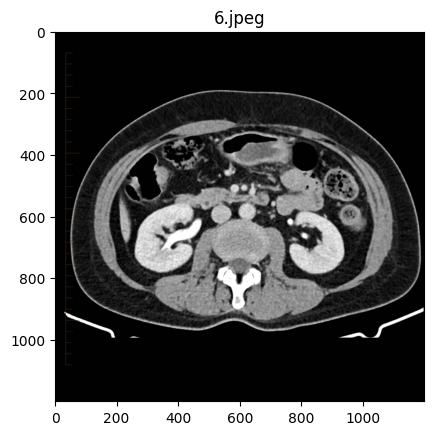

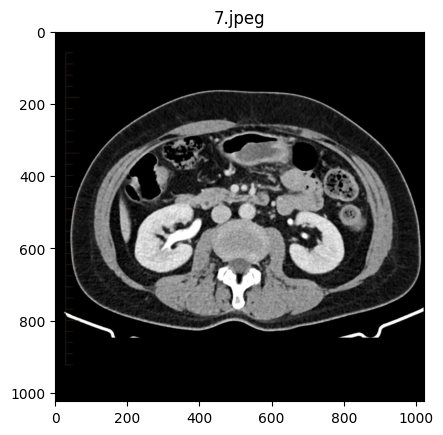

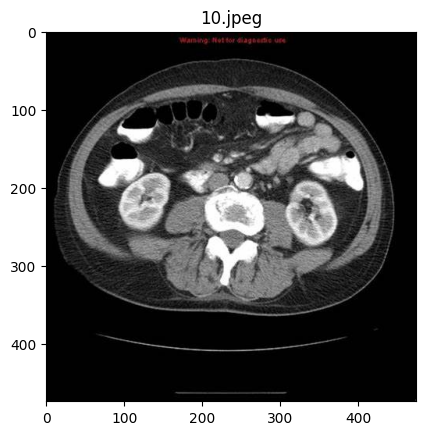

Error processing item at /content/drive/MyDrive/data/selected_features.pkl: cannot identify image file <_io.BytesIO object at 0x7fe1fb541c60>
Error processing item at /content/drive/MyDrive/data/normalized_features.pkl: cannot identify image file <_io.BytesIO object at 0x7fe1fb541c60>


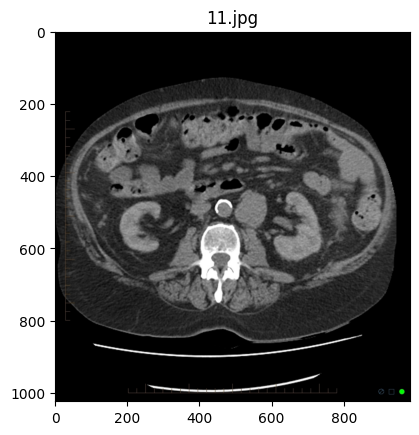

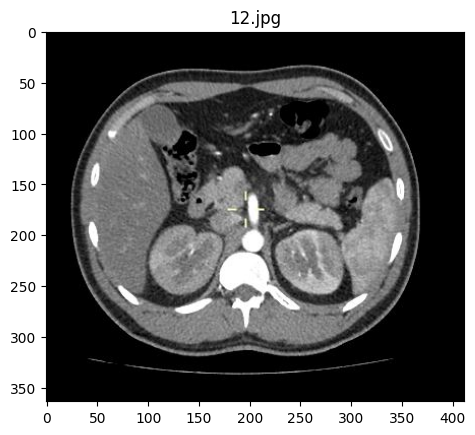

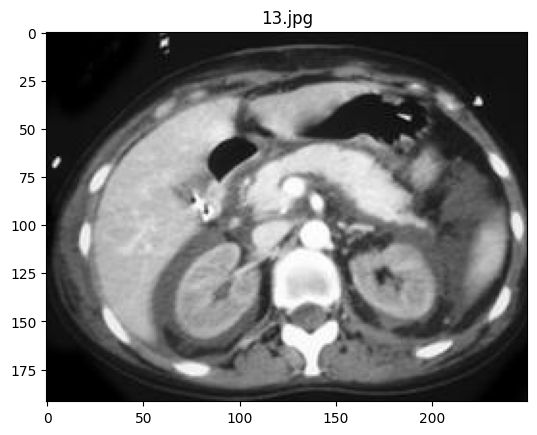

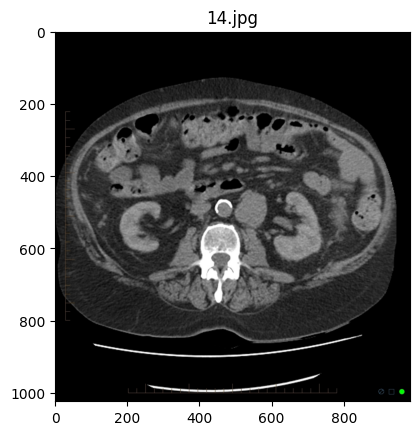

In [ ]:
import os
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt


directory = '/content/drive/MyDrive/data/'

for item in os.listdir(directory):
    item_path = os.path.join(directory, item)

    if os.path.isdir(item_path):
        continue

    try:
        img = load_img(item_path)
        plt.imshow(img)
        plt.title(item)
        plt.show()

    except Exception as e:
        print(f"Error processing item at {item_path}: {e}")


In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif, VarianceThreshold
import pickle

image_paths = ['/content/drive/MyDrive/data/1.jpeg', '/content/drive/MyDrive/data/2.jpeg', '/content/drive/MyDrive/data/3.jpeg',
               '/content/drive/MyDrive/data/4.jpeg', '/content/drive/MyDrive/data/5.jpeg', '/content/drive/MyDrive/data/6.jpeg',
               '/content/drive/MyDrive/data/7.jpeg', '/content/drive/MyDrive/data/8.jpeg', '/content/drive/MyDrive/data/9.jpeg',
               '/content/drive/MyDrive/data/10.jpeg','/content/drive/MyDrive/data/11.jpg','/content/drive/MyDrive/data/12.jpg',
               '/content/drive/MyDrive/data/13.jpg','/content/drive/MyDrive/data/14.jpg']

flattened_features = {key: value.flatten() for key, value in features.items()}


features_df = pd.DataFrame.from_dict(flattened_features, orient='index', columns=[f'feature_{i}' for i in range(len(flattened_features[next(iter(flattened_features))]))])

selector = VarianceThreshold()
features_df = pd.DataFrame(selector.fit_transform(features_df), index=features_df.index)
target_variable = [0, 0, 0, 0, 0, 0, 0, 0, 0, 1,1,1,1,1]

k = 10
k_best_selector = SelectKBest(score_func=f_classif, k=k)
selected_features = k_best_selector.fit_transform(features_df, target_variable)

with open('/content/drive/MyDrive/data/selected_features.pkl', 'wb') as file:
    pickle.dump(selected_features, file)


In [ ]:
class_counts = pd.Series(y_test).value_counts()
print("Class Distribution in Test Set:\n", class_counts)

Class Distribution in Test Set:
 0    6
1    3
dtype: int64


In [ ]:
pd.set_option('display.max_rows', None)
print("Shape of features_df:", features_df.shape)

print("Head of features_df:", features_df.head())
print("Shape of selected_features:", selected_features.shape)
pd.reset_option('display.max_rows')

Shape of features_df: (14, 2748)
Head of features_df:                                     0     1     2         3         4     \
/content/drive/MyDrive/data/1.jpeg   0.0   0.0   0.0  0.030578  3.372800   
/content/drive/MyDrive/data/2.jpeg   0.0   0.0   0.0  0.175650  2.310589   
/content/drive/MyDrive/data/3.jpeg   0.0   0.0   0.0  0.000000  4.103809   
/content/drive/MyDrive/data/4.jpeg   0.0   0.0   0.0  0.000000  2.943313   
/content/drive/MyDrive/data/5.jpeg   0.0   0.0   0.0  0.163693  3.973668   

                                    5         6         7         8     9     \
/content/drive/MyDrive/data/1.jpeg   0.0  0.000000  0.000000  0.000000   0.0   
/content/drive/MyDrive/data/2.jpeg   0.0  0.000000  0.000000  0.000000   0.0   
/content/drive/MyDrive/data/3.jpeg   0.0  0.546655  0.000000  0.000000   0.0   
/content/drive/MyDrive/data/4.jpeg   0.0  1.035980  0.591327  1.305457   0.0   
/content/drive/MyDrive/data/5.jpeg   0.0  0.177356  0.531399  0.000000   0.0   

        

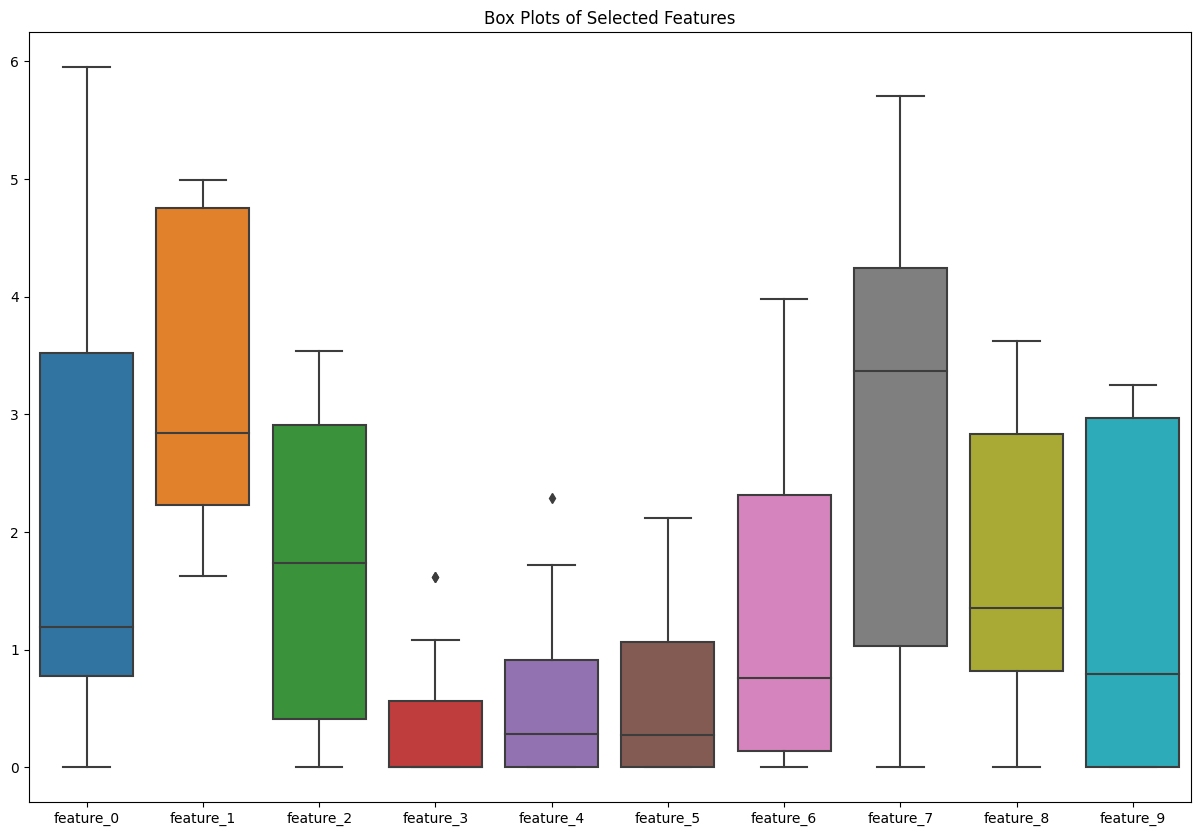

In [ ]:
import seaborn as sns
import pandas as pd

selected_features_df = pd.DataFrame(selected_features, columns=[f'feature_{i}' for i in range(selected_features.shape[1])])

plt.figure(figsize=(15, 10))
sns.boxplot(data=selected_features_df)
plt.title('Box Plots of Selected Features')
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(selected_features)
with open('/content/drive/MyDrive/data/normalized_features.pkl', 'wb') as file:
    pickle.dump(normalized_features, file)

In [ ]:
print("Shape of normalized_features:", normalized_features.shape)
print("Head of normalized_features:", normalized_features)


Shape of normalized_features: (14, 10)
Head of normalized_features: [[8.83813351e-02 1.75705940e-01 8.54844987e-01 0.00000000e+00
  7.86809772e-02 0.00000000e+00 0.00000000e+00 5.27516186e-01
  0.00000000e+00 0.00000000e+00]
 [1.16665073e-01 1.93674177e-01 1.00000000e+00 0.00000000e+00
  1.51851666e-04 1.49872184e-01 0.00000000e+00 6.73976064e-01
  3.15778077e-01 0.00000000e+00]
 [1.18016362e-01 3.82260472e-01 9.45383847e-01 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 6.63836300e-01
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 8.37951124e-01 0.00000000e+00
  0.00000000e+00 0.00000000e+00 2.34634623e-01 1.00000000e+00
  2.14535534e-01 0.00000000e+00]
 [2.09787413e-01 3.50356102e-03 7.74459302e-01 0.00000000e+00
  1.42007004e-02 1.03262514e-01 0.00000000e+00 7.68136024e-01
  0.00000000e+00 0.00000000e+00]
 [3.28426093e-01 7.18677759e-01 4.69015539e-01 0.00000000e+00
  2.62404561e-01 3.73692840e-01 4.26479489e-01 3.86198550e-01
  5.78678310e-01 7.2990

In [ ]:
class_counts = pd.Series(y_test).value_counts()
print("Class Distribution in Test Set:\n", class_counts)

Class Distribution in Test Set:
 0    6
1    3
dtype: int64


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import pickle

with open('/content/drive/MyDrive/data/selected_features.pkl', 'rb') as file:
    normalized_features = pickle.load(file)

target_variable = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,1,1])

X_train, X_test, y_train, y_test = train_test_split(
    normalized_features, target_variable, test_size=0.6, random_state=52, stratify=target_variable
)


model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8888888888888888
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.75      1.00      0.86         3

    accuracy                           0.89         9
   macro avg       0.88      0.92      0.88         9
weighted avg       0.92      0.89      0.89         9



In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000)
}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy}")
    print(f"{name} Classification Report:\n", classification_report(y_test, y_pred))
    print("\n" + "="*40 + "\n")

Training Logistic Regression...
Logistic Regression Accuracy: 0.8888888888888888
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.75      1.00      0.86         3

    accuracy                           0.89         9
   macro avg       0.88      0.92      0.88         9
weighted avg       0.92      0.89      0.89         9



Training Decision Tree...
Decision Tree Accuracy: 1.0
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         3

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



Training Random Forest...
Random Forest Accuracy: 0.8888888888888888
Random Forest Classification Report:
               prec